## Opening a Cafe In Singapore?

One aspect of Singaporean culture that has gained widespread popularity in recent years is the café scene. With a plethora of unique and trendy cafes popping up all over the city, locals and tourists alike have been flocking to these cozy and inviting spaces to indulge in a cup of coffee, catch up with friends, or get some work done. 

From artisanal coffee shops serving up specialty brews to Instagram-worthy cafes featuring beautifully crafted pastries and desserts, Singapore's cafe culture has something to offer everyone. These cafes have become more than just places to grab a quick caffeine fix; they have become social hubs where people come together to enjoy good food, great company, and a welcoming atmosphere.

With the rise of social media and the increasing popularity of influencer culture, Singapore's cafe scene has only continued to grow in popularity. Many of these cafes are known for their aesthetic and Instagrammable interiors, making them the perfect backdrop for a quick photoshoot or a casual hangout with friends.

I shall investigate the profitability of setting up a cafe in Singapore.


In [166]:
# Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
sns.set(rc={'figure.figsize':(13,8)})
pd.options.mode.chained_assignment = None  # default='warn'


### Cafe trends in Singapore

Firstly, I will observe the trends in the Food and Beverages Industry over the course of the past few years.

Text(0.5, 1.0, 'Number of Enterprises')

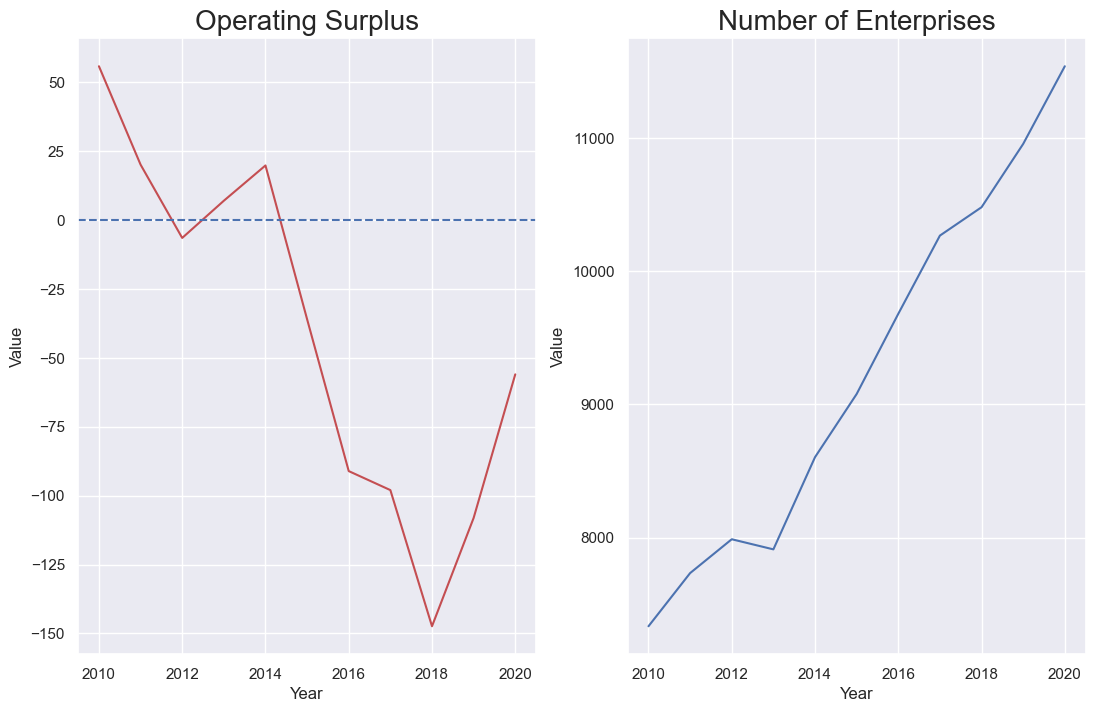

In [198]:
industry = pd.read_excel("servicesore.xlsx", sheet_name = "Table 1")
industry = industry.drop('Flag', axis = 1)
industry = industry.loc[industry['Broad Industry'] == 'SSIC 56 Food & Beverage Services']

# We are only interested in smaller firms
industry = industry.loc[industry['Size of Operating Revenue'] == '<=$10M']
industry_num = industry.loc[(industry['Key Indicators'] == "Number of Enterprises")]
industry = industry.loc[(industry['Key Indicators'] == "Operating Surplus")]

fig, ax =plt.subplots(1,2)
first = sns.lineplot(x = 'Year',
            y ='Value',
            data= industry,
            color = 'r',
            ax = ax[0])

second = sns.lineplot(x = 'Year',
            y ='Value',
            data= industry_num,
            ax = ax[1])

first.axhline(0, linestyle = 'dashed')
first.set_title('Operating Surplus' , size = 20)
second.set_title('Number of Enterprises', size = 20)



The data is only until 2020. However, it seems like the Food and Beverages Industry in Singapore is seeing a constant increase even though the operating surplus (indicator of performance) saw an overall downward trend. There may be a few reasons for this.
1. Increased Competitions. An increased number of enterprises causes an increase in competition for market share and consumer demand. In theory, this would cause prices to decrease and hence revenue to decrease.
2. Inefficiencies. Niche Cafe Shops are less efficient compared to bigger firms.
3. Increase in cost. More enterprises could mean a higher demand for food and beverages supplies, in theory this would translate into higher supply costs. 

The data provides us with a good understand of the trend. The increase in enterprises could have caused the industry to be saturated or the negative operating surplus might signal that it is not profitable to partake in the food and beverages industry.

I will take a look at more recent data regarding the formation and cessation of new Cafes over more recent years.

In [168]:
form_cease = pd.read_excel("fnbfce.xlsx", sheet_name = "Table 2")
print(form_cease.head())

  Reference Month Industry Group  Flag_F  Flag_C  Formation  Cessation
0      2020-01-01    RESTAURANTS       0       0         50         40
1      2020-02-01    RESTAURANTS       0       0         61         34
2      2020-03-01    RESTAURANTS       0       0         58         31
3      2020-04-01    RESTAURANTS       0       0         21         46
4      2020-05-01    RESTAURANTS       0       0         31         48


In [169]:
form_cease.value_counts(['Industry Group','Flag_F','Flag_C'])

Industry Group                                Flag_F  Flag_C
CAFES                                         0       0         37
FAST FOOD OUTLETS                             0       0         37
FOOD CATERERS                                 0       0         37
FOOD KIOSKS MAINLY FOR TAKEAWAY AND DELIVERY  0       0         37
OTHER FOOD AND BEVERAGE                       0       0         37
RESTAURANTS                                   0       0         37
dtype: int64

The flag columns are empty. I will remove them.

Text(0.5, 1.0, 'Number of Cafes Opening versus Closing')

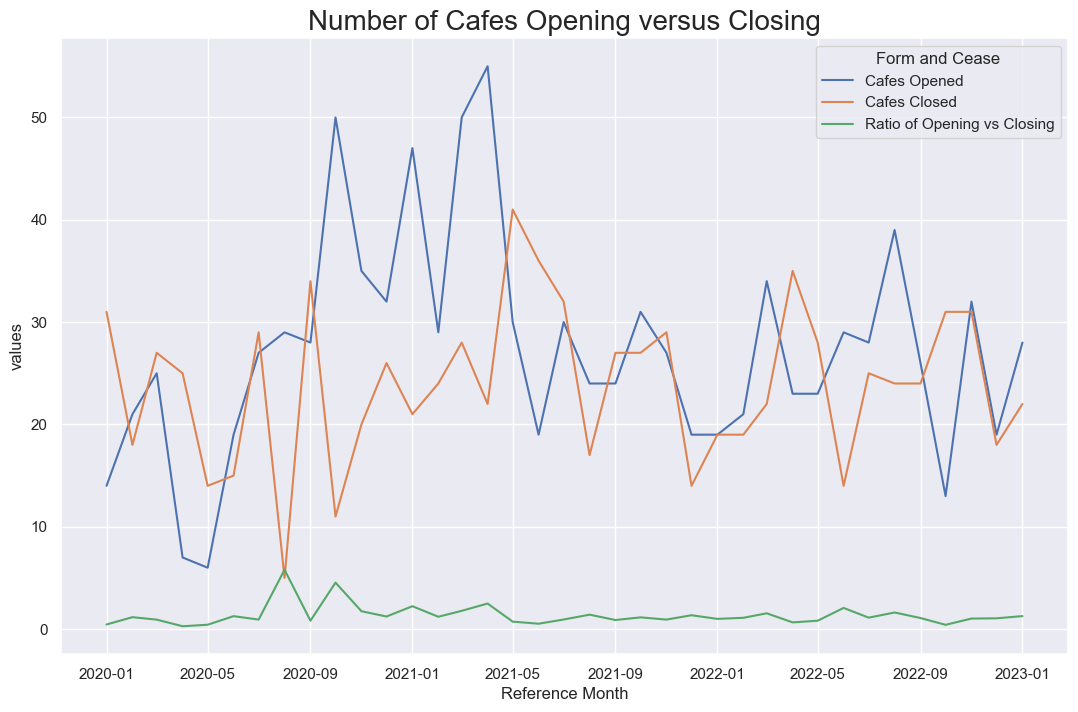

In [170]:
# Drop columns
form_cease = form_cease.drop(["Flag_F","Flag_C"], axis = 1)
cafes_data = form_cease.loc[form_cease['Industry Group'] == 'CAFES']
cafes_data = cafes_data.drop('Industry Group', axis = 1)
cafes_data["Ratio of Opening vs Closing"] = cafes_data["Formation"] / cafes_data["Cessation"]
cafes_data = cafes_data.melt('Reference Month', var_name = 'Form and Cease',  value_name = 'values')
cafes_data = cafes_data.replace('Formation', 'Cafes Opened')
cafes_data = cafes_data.replace('Cessation', 'Cafes Closed')
plot = sns.lineplot(x = 'Reference Month',
            y ='values',
            hue = 'Form and Cease',
            data=cafes_data)
plot.set_title('Number of Cafes Opening versus Closing', size = 20)


The rate at which cafes are opened is still positive over the last 3 years. This could mean that there is still profits within the market to be shared. Because it is a niche market, it is highly likely that this is due to growing consumer demand. I shall investigate if this is true. 

Text(0, 0.5, 'Sale Index')

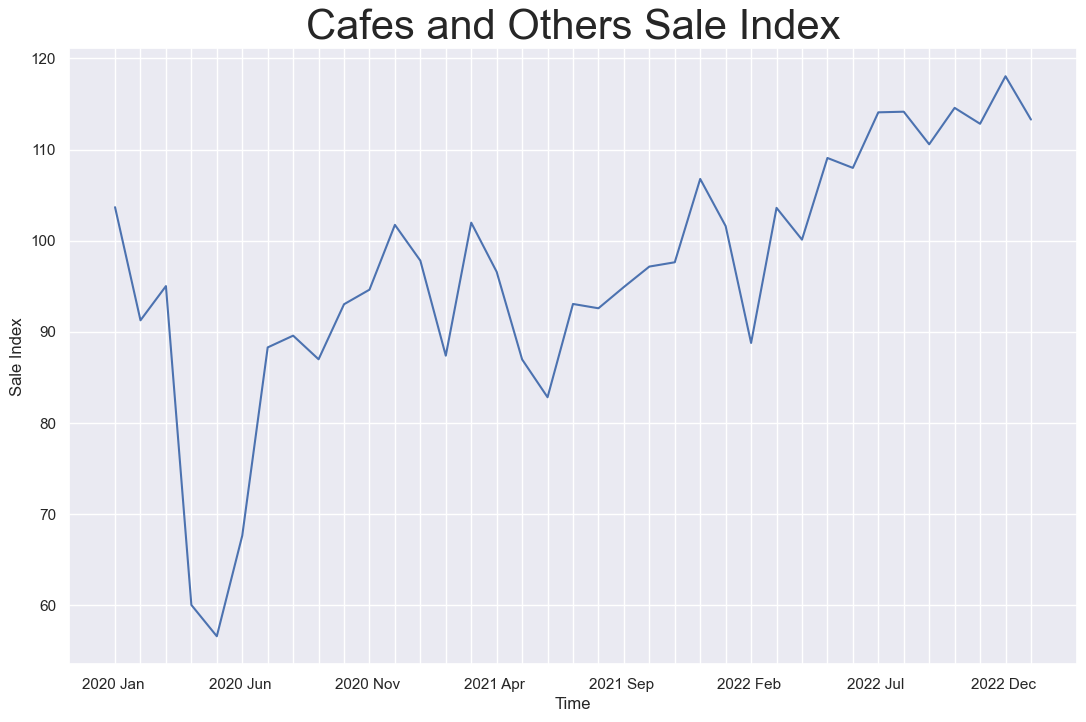

In [171]:
total_services = pd.read_excel('M601661.xlsx',usecols= 'A:AL')
total_services = total_services.iloc[[9,14]]
total_services.columns = total_services.iloc[0]
total_services = total_services.drop(total_services.index[0])
total_services = total_services.melt(var_name = 'Time' , id_vars = 'Data Series')
total_services['Data Series'] = 'Cafes and Others'
## Reverse Order of Data Frame to become ascending
total_services = total_services.iloc[::-1]
plot = sns.lineplot(x = 'Time',
            y ='value',
            data= total_services)

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plot.set_title('Cafes and Others Sale Index',
               fontsize = 30)
plot.set_ylabel('Sale Index')

Though the sale index may not be fully representative of growing consumer demand. For a niche market like cafes, product differentiation is difficult. Therefore, it is safe to attribute this to growing consumer demand. 
Also, the ratio of cafes opening and closing remains positive over the last few years. This is hints that the industry is still growing.

Since this is so, now I shall shortlist some potential places if I plan to establish a cafe.

## Where is possibly the best place to open a Cafe?
I will investigate where is the possible best place to open a Cafe. I will take these factors into account
1. Number of Residents living in the vicinity
2. Rent Prices

By determining the best ratio between the number of residents to the rental prices. I will find out which areas are the most worth.

## Data Cleaning

Let's carry out some simple data exploration and cleaning.

I will use Retail Rental Data from Q4 of 2022 and Population data from 2016.

I will naively use the median rental prices for the sake of simplicity.


In [172]:
# Read in Retail rent prices
rent = pd.read_excel("median-rental.xlsx", usecols = "A:D")
rent.columns = rent.iloc[2]
rent = rent.drop(index = range(3))

# Only retain median price
rent = rent.drop(columns = ["25th Percentile", "75th Percentile"])
rent.columns = ["Location", "Median Rent Price"]

# Remove NA values
rent = rent.dropna()

# Convert prices to number
rent = rent[rent["Median Rent Price"] != "-"]
rent["Median Rent Price"].astype("float")
# Order the locations from the lowest prices.
sorted_rent = rent.sort_values(by = "Median Rent Price")
sorted_rent.head(10)

,Location,Median Rent Price
126,SOPHIA ROAD,29.58
127,SOUTH BRIDGE ROAD,39.29
55,JALAN SULTAN,40
31,CUSCADEN ROAD,41.05
140,TELOK BLANGAH ROAD,42.01
13,BROOKE ROAD,43.15
128,SOUTH BUONA VISTA ROAD,44.44
153,WEST COAST DRIVE,48.39
82,MOUNTBATTEN ROAD,49.24
160,YIO CHU KANG ROAD,50.92


It appears that rental locations are specific to the roads. 

I will proceed to clean and explore the population data.

In [173]:
residents = pd.read_excel('8182 (1).xlsx', usecols= "A:T")
residents.iloc[10,0] = "Estate"
residents.columns = residents.iloc[10]
residents = residents.iloc[12:-25]
residents.head(10)

10,Estate,Total,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 & Over
12,Ang Mo Kio- Total,174770,6790,7660,8290,9320,10310,11170,12250,13070,13710,13000,14010,13800,12980,11050,6670,5140,3250,2300
13,Ang Mo Kio Town Centre,5020,260,280,320,280,260,310,370,420,490,420,350,320,280,270,160,120,60,50
14,Cheng San,29770,1290,1180,1290,1400,1570,1830,2490,2490,2460,2220,2320,2290,2320,1920,1070,790,480,370
15,Chong Boon,27900,910,1100,1180,1370,1520,1800,1980,2100,2040,2060,2270,2260,2250,1950,1290,920,540,380
16,Kebun Bahru,23910,780,1010,1080,1240,1380,1490,1570,1730,1860,1860,1940,1890,1800,1610,1010,810,530,330
17,Sembawang Hills,6890,200,360,460,550,550,450,310,320,500,550,590,520,430,400,260,190,140,130
18,Shangri-La,18510,750,790,850,1030,1120,1170,1290,1240,1370,1420,1610,1440,1360,1110,750,560,430,250
19,Tagore,8350,330,370,450,580,740,650,420,480,610,590,700,760,590,400,220,200,140,120
20,Townsville,23770,1140,1100,940,1010,1230,1480,1750,2070,1860,1560,1760,1830,1670,1590,1040,840,520,380
21,Yio Chu Kang,30,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


Some issues can be observed from this
1. It is possible that the ``Estate`` contains Major Region and Sub Regions. For example, ``Cheng San`` is a part of `` Ang Mo Kio``. Hence it is likely that `` Ang Mo Kio-Total`` is the sum of its subregions.
2. The data provides me with information of people age ranged from 0 to 85 & over. It is important to consider the appropriate age groups for this analysis

Let's take a closer look at the ``Estates``

In [174]:
## Extract out Rows which contain -total in the name
residents[residents['Estate'].str.contains('Total')].head()

10,Estate,Total,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 & Over
12,Ang Mo Kio- Total,174770,6790,7660,8290,9320,10310,11170,12250,13070,13710,13000,14010,13800,12980,11050,6670,5140,3250,2300
25,Bedok- Total,289750,11690,13400,14750,16930,19450,19860,19270,20850,22520,21460,23430,23380,20590,16750,9310,7330,4760,4010
34,Bishan- Total,90700,3430,4330,4710,5520,6860,6460,5720,6000,7070,6800,7540,7700,6360,4860,2730,2140,1370,1090
38,Boon Lay- Total,30,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
43,Bukit Batok- Total,139270,5510,6890,7970,9240,10070,10460,9760,9940,10980,11310,12190,11770,9370,5990,3060,2230,1450,1090


It seems like my suscipion is true. I will remove the major region entries.

In [182]:
residents = residents[residents['Estate'].str.contains('Total') == False]
residents[residents['Estate'].str.contains('Total')].head()

10,Estate,Total,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 & Over


A simple google search leads me a [page](https://www.ipm.ge/index.php/en/%E1%83%A1%E1%83%98%E1%83%90%E1%83%AE%E1%83%9A%E1%83%94%E1%83%94%E1%83%91%E1%83%98/144-whole-month-spent-at-restaurants#:~:text=Young%20people%20between%20the%20ages,and%20restaurants%20during%20their%20life.) that suggests that a majority of Cafe enjoyers come from the youths. Hence, I will only take into account Residents aged between 15 and 34. Because the data was last updated in 2016, I will consider younger residents who are in this youth category as of 2023.

In [188]:
#Selecting the columns of Age Groups I am interested in
youths = residents[['Estate','10-14','15 - 19','20 - 24','25 - 29']]

# Define a function to help sum the number of people
def summation(row):
    total = 0
    for i in row:
        try:
            total += int(i)
        except:
            total = 0
    return total

#Sum the number of youths
youths['total'] = youths.apply(summation,axis=1)
youths.head()

10,Estate,15 - 19,20 - 24,25 - 29,30 - 34,total
13,Ang Mo Kio Town Centre,280,260,310,370,1220
14,Cheng San,1400,1570,1830,2490,7290
15,Chong Boon,1370,1520,1800,1980,6670
16,Kebun Bahru,1240,1380,1490,1570,5680
17,Sembawang Hills,550,550,450,310,1860


As I would like to find the cheapest place, I would consider only the top 20 cheapest rentals.

Afterwards, I will need to map the rental places to population region. There are two ways I will go around this.
1. Extract out the region from the Street Name. i.e. Extracting out `` West Coast `` from `` West Coast Drive`` will give me a region
2. Manually fill in regions for those roads that do not contain the region within the names.

In [191]:
# Filter top 20 places
cheapest_rental = sorted_rent.iloc[:20,:]

# Attempt to extract region names
cheapest_rental['Estate'] = cheapest_rental.loc[:,'Location']
remove_list = [' ROAD',' DRIVE']
for i in remove_list :
    cheapest_rental['Estate'] = cheapest_rental['Estate'].str.replace(i, '')


youths['Estate'] = youths['Estate'].map(str.upper)

cheapest_rental

,Location,Median Rent Price,Estate
126,SOPHIA ROAD,29.58,SOPHIA
127,SOUTH BRIDGE ROAD,39.29,SOUTH BRIDGE
55,JALAN SULTAN,40,JALAN SULTAN
31,CUSCADEN ROAD,41.05,CUSCADEN
140,TELOK BLANGAH ROAD,42.01,TELOK BLANGAH
13,BROOKE ROAD,43.15,BROOKE
128,SOUTH BUONA VISTA ROAD,44.44,SOUTH BUONA VISTA
153,WEST COAST DRIVE,48.39,WEST COAST
82,MOUNTBATTEN ROAD,49.24,MOUNTBATTEN
160,YIO CHU KANG ROAD,50.92,YIO CHU KANG


I will fill in manually the ``Estate`` names that do not map with region names.

In [185]:
cheapest_rental['Residents'] = 0
cheapest_rental.reset_index(drop = True, inplace = True)
cheapest_rental.iloc[0,-2] = 'SELEGIE'
cheapest_rental.iloc[1,-2] = 'CHINATOWN'
cheapest_rental.iloc[2,-2] = 'LAVENDER'
cheapest_rental.iloc[3,-2] = 'BOULEVARD'
cheapest_rental.iloc[5,-2] = 'MARINE PARADE'
cheapest_rental.iloc[6,-2] = 'KENT RIDGE'
cheapest_rental.iloc[10,-2] = 'CITY HALL'
cheapest_rental.iloc[11,-2] = 'ALJUNIED'
cheapest_rental.iloc[13,-2] = 'KATONG'
cheapest_rental.iloc[12,-2] = 'PEARL\'S HILL'
cheapest_rental.iloc[14,-2] = 'KATONG'
cheapest_rental.iloc[16,-2] = 'CLARKE QUAY'

Now i will combine information from the 2 data sets. Afterwards, I would calculate a ratio between rental prices and residents in that region.

In [186]:
# Combine Data
for index1,row1 in cheapest_rental.iterrows():
    for index,row in youths.iterrows():
        if row1[-2] in row[0]:
            cheapest_rental.iloc[index1,-1] += row[-1]

#Calculate Ratio  
cheapest_rental['Ratio'] = cheapest_rental['Residents']/cheapest_rental['Median Rent Price']

#Extract top 10 best locations
top_10_location = cheapest_rental.sort_values(by = "Ratio",ascending=False).head(10)

Text(0.5, 1.0, 'Residents per Price')

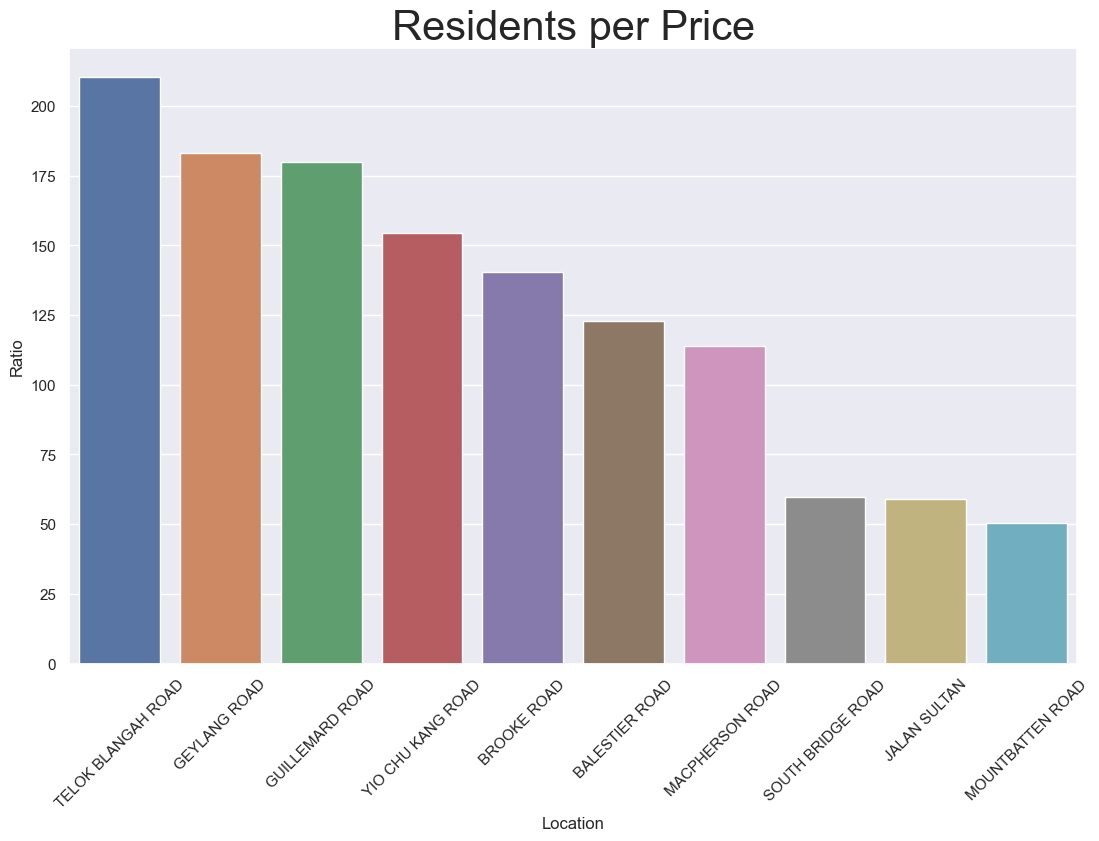

In [187]:
# Visual representation
plot = sns.barplot(x = 'Location',
                y = 'Ratio',
                data = top_10_location)
plot.tick_params(axis='x', rotation=45)
plot.set_title("Residents per Price", size = 30)

## Conclusion

The above graph shows me the best places I can consider looking into to locate my cafe. However, it is important to take into account a few things. 
1. Rental Prices are in price per square metre (psm). Hence bigger units might total up to an amount more than that of smaller units with more expensive psm. It is important to consider how much space is required and find a good trade off.
2. Accessbility. More information is required about the accessibility of units along these regions.
3. For this analysis, I assumed that residents are the ones patronizing cafes in the region. However, in reality this might not hold true. It is important to consider if there is a local demand for a Cafe in that region or whether it is a location which would attract people to travel to.
4. Competition. It is could be unwise to open a cafe when there are multiple competitors within the region.

Ultimately, I have shortlisted 10 regions because to help narrow down the options I could be looking at. Physically going down to monitor the factors I have mentioned above would be for the best. 

